<a href="https://colab.research.google.com/github/Armestrong/data_science_analizingData_airbnb/blob/master/analyzing_data_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# Análise dos Dados do Airbnb - Hong Kong

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Hong Kong, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [0]:
# importar os pacotes necessarios
import pandas as pnd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
hk = pnd.read_csv('http://data.insideairbnb.com/china/hk/hong-kong/2019-09-20/visualisations/listings.csv')

In [8]:
# mostrar as 5 primeiras entradas
hk.head(5)

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,69074,Beautiful oasis of plants & art @ best location,160139,Amy,NaN,Central & Western,22.28352,114.15018,Entire home/apt,1409,3,132,2019-09-05,1.26,1,173
1,101765,Lamma Island flat 2min walk from the beach!,532909,Michael,NaN,Islands,22.20022,114.13461,Entire home/apt,431,2,11,2019-06-09,0.62,1,19
2,103760,Central Centre 5 min walk to/from Central MTR,304876,Brend,NaN,Central & Western,22.28407,114.15570,Entire home/apt,853,2,262,2019-07-22,2.61,12,329
3,132773,Fabulous 2 Bdrm Aprt Open kitchen,304876,Brend,NaN,Central & Western,22.28868,114.14494,Entire home/apt,1057,2,263,2019-08-15,2.64,12,323
4,133390,"Soho, Hong Kong 1 bedroom flat",654642,Robin,NaN,Central & Western,22.28343,114.15539,Entire home/apt,939,2,27,2015-06-30,0.27,1,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [20]:
#Consultar o nome das colunas do DataFrame


for col in hk.columns: print(col)

id
name
host_id
host_name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365


In [28]:
# identificar o volume de dados do DataFrame
print("Variaveis = Linhas:\t{}".format(hk.shape[0]))
print("Entradas = Colunas:\t{}\n".format(hk.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(hk.dtypes)

Variaveis = Linhas:	12627
Entradas = Colunas:	16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Análise dos Dados


**Dicionário das variáveis**

* ***id*** - Número de id gerado para identificar o imóvel.
* ***name*** - Nome da propriedade anunciada.
* ***host_id*** - Numero de id do proprietario (anfitrião) da propriedade.
* ***neighbourhood_group*** - Esta coluna não contem nenhum valor valido.
* ***neighbourhood*** - Nome do bairro.
* ***latitude*** - Coordenada da latitude da propriedade.
* ***longitude*** - Coordenada da longitude da propriedade.
* ***room_type*** - informa o tipo da propriedade (apartamento todo/quarto/...) 
* ***price*** - Valor do aluguel da propriedade/imovel.
* ***minimum_nights*** - Quantidade minima de noites para reservar.
* ***number_of_reviews*** - Numero de reviews que a propriedade possui
* ***last_review*** - Data do ultimo review.
* ***reviews_per_month*** - Quantidade de reviews por mes.
* ***calculated_host_listings_count*** - Quantidade de imoveis do mesmo anfitrião.
* ***availability_365*** - Numero de dias de disponibilidade dentro de 365 dias.



**Tipos de variaveis**
* *Numericas*
 * *Chave primaria*
   * *id*
 * *Discretas* **Int**
   * *host_id*
   * *price*
   * *minimum_nights*
   * *number_of_reviews*
   * *calculated_host_listings_count*
   * *availability_365*

 * *Continuas* **Float / Double**
   * *neighbourhood_group*
   * *latitude*
   * *longitude*
   * *reviews_per_month*
 

* *Categoricas* **String**
 * *name*
 * *host_name*
 * *neighbourhood*
 * *room_type*
 * *last_review*

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [43]:
#Quantidade de valores faltantes por coluna
hk.isnull().sum()

id                                    0
name                                  9
host_id                               0
host_name                             2
neighbourhood_group               12627
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        3940
reviews_per_month                  3940
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [36]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(hk.isnull().sum()/ hk.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.312030
last_review                       0.312030
name                              0.000713
host_name                         0.000158
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

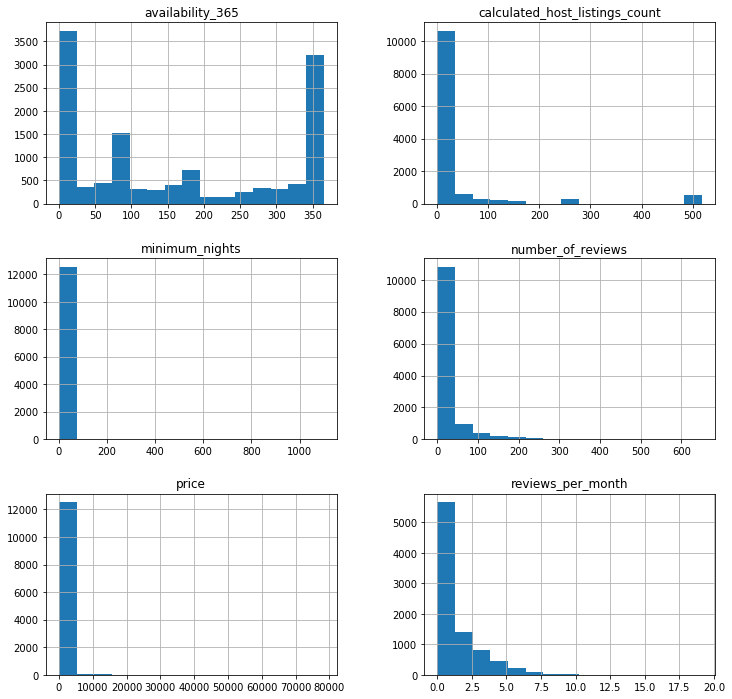

In [124]:
# plotar o histograma das variáveis numéricas
hk[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].hist(bins=15, figsize=(12,12));

### **Q4. Qual a média dos preços de aluguel?**

In [126]:
# ver a média da coluna `price``
hk.price.mean() 
# ou
hk ['price'].mean()

760.6150312821732

### **Q4. Qual a correlação existente entre as variáveis**

In [112]:
# criar uma matriz de correlação
corrhk = hk[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr();

display(corrhk)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.032728,-0.016129,-0.031780,-0.075660,-0.021579
minimum_nights,-0.032728,1.000000,-0.095576,-0.086322,0.199123,0.152008
number_of_reviews,-0.016129,-0.095576,1.000000,0.682951,-0.132835,0.044010
reviews_per_month,-0.031780,-0.086322,0.682951,1.000000,-0.044511,0.085619
calculated_host_listings_count,-0.075660,0.199123,-0.132835,-0.044511,1.000000,0.378976
availability_365,-0.021579,0.152008,0.044010,0.085619,0.378976,1.000000


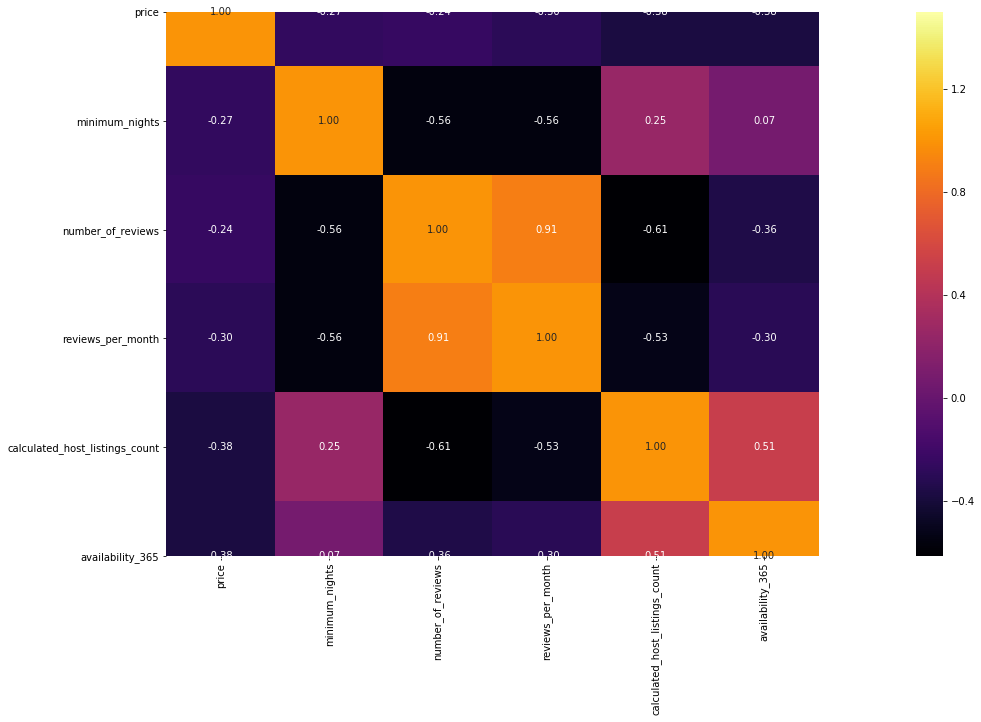

In [163]:
# mostrar a matriz de correlação
plt.subplots(figsize=(35,10));
sns.heatmap(corrhk.corr(), cmap='inferno', fmt='.2f', square=True, vmax=1.5, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [151]:
# mostrar a quantidade de cada tipo de imóvel disponível
hk.room_type.value_counts()

Entire home/apt    6100
Private room       5544
Shared room         607
Hotel room          376
Name: room_type, dtype: int64

In [152]:
# mostrar a porcentagem de cada tipo de imóvel disponível
hk.room_type.value_counts() / hk.shape[0]

Entire home/apt    0.483092
Private room       0.439059
Shared room        0.048072
Hotel room         0.029777
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [168]:
# ver preços por bairros, na média
hk.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Tai Po               1968.385965
Southern             1868.509434
Tsuen Wan            1429.973333
Kwai Tsing            976.395349
Kowloon City          872.186858
Central & Western     814.777820
Sai Kung              813.401274
Islands               766.184015
Kwun Tong             745.823529
Yau Tsim Mong         744.620042
Name: price, dtype: float64

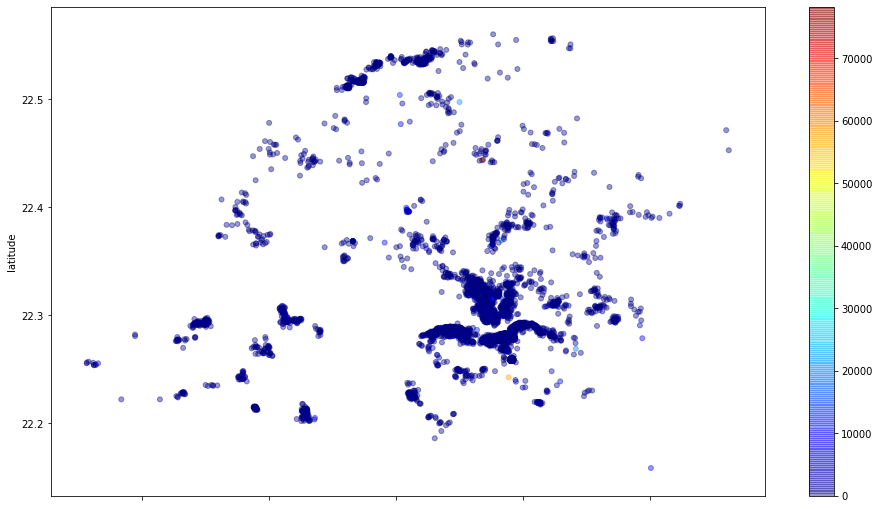

In [181]:
# plotar os imóveis pela latitude-longitude
hk.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=hk['price'], s=25, cmap=plt.get_cmap('jet'), figsize=(16,9));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [169]:
# ver a média da coluna `minimum_nights``

hk.minimum_nights.mean()

8.238061297220243

## Conclusões
